# **Hand Written Digit Prediction - Classification Analysis**

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

Data source : Sklearn datasets

In [25]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#importing data

from sklearn.datasets import load_digits

In [27]:
df = load_digits()

In [28]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

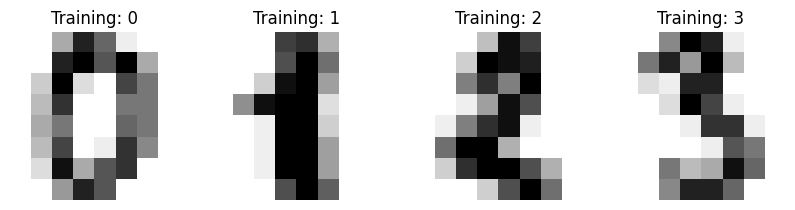

In [29]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
  ax.set_title("Training: %i"% label)

# Data Preprocessing
Flatten Image

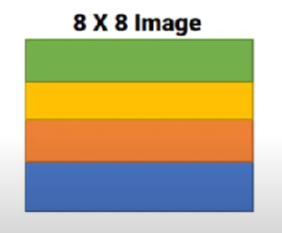

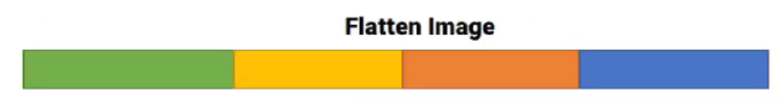









In [30]:
df.images.shape

(1797, 8, 8)

In [31]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [32]:
df.images[0].shape

(8, 8)

In [33]:
len(df.images)

1797

In [34]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [35]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [36]:
data[0].shape

(64,)

In [37]:
data.shape

(1797, 64)

#Scaling Image Data

In [38]:
data.min()

0.0

In [39]:
data.max()

16.0

In [40]:
data = data/16

In [41]:
data.min()

0.0

In [42]:
data.max()

1.0

In [43]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [44]:
#Train Test Split

from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test,y_train, y_test = train_test_split(data,df.target,test_size=0.3)

In [47]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [48]:
#selecting model

from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
#predict test data

y_pred = rf.predict(X_test)

In [55]:
y_pred

array([5, 8, 9, 4, 6, 0, 2, 1, 0, 7, 1, 6, 1, 7, 4, 7, 7, 1, 3, 4, 7, 4,
       8, 8, 2, 2, 9, 5, 5, 0, 9, 6, 1, 4, 2, 8, 0, 0, 5, 1, 0, 9, 1, 3,
       4, 1, 9, 2, 9, 9, 7, 1, 3, 7, 7, 1, 6, 7, 9, 3, 8, 7, 1, 6, 9, 7,
       0, 9, 6, 6, 3, 7, 1, 5, 3, 4, 5, 8, 8, 2, 3, 8, 0, 6, 3, 9, 5, 0,
       8, 5, 1, 5, 2, 6, 7, 9, 5, 1, 8, 2, 1, 4, 4, 4, 4, 9, 1, 4, 6, 6,
       7, 7, 6, 8, 7, 0, 5, 8, 3, 9, 8, 1, 5, 3, 4, 1, 6, 3, 4, 1, 2, 1,
       5, 4, 3, 7, 3, 9, 3, 1, 5, 0, 2, 9, 5, 8, 9, 9, 3, 4, 1, 1, 7, 7,
       8, 5, 8, 1, 2, 7, 8, 1, 1, 2, 3, 3, 2, 7, 4, 1, 2, 9, 4, 6, 5, 9,
       1, 2, 7, 0, 4, 0, 0, 5, 2, 3, 1, 6, 7, 0, 2, 5, 1, 0, 5, 6, 8, 2,
       0, 2, 9, 6, 5, 1, 6, 2, 8, 4, 4, 9, 3, 5, 2, 0, 0, 2, 8, 1, 1, 5,
       1, 1, 1, 0, 4, 4, 1, 7, 8, 2, 6, 6, 7, 9, 5, 4, 9, 9, 5, 5, 4, 5,
       5, 2, 1, 0, 3, 5, 7, 6, 7, 7, 1, 7, 9, 3, 2, 3, 5, 5, 1, 7, 8, 6,
       3, 0, 3, 7, 4, 1, 1, 8, 0, 8, 8, 0, 9, 4, 5, 9, 6, 0, 6, 6, 3, 4,
       4, 2, 5, 4, 3, 9, 8, 8, 6, 5, 3, 0, 6, 1, 9,

In [56]:
#model accuracy

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
confusion_matrix(y_test,y_pred)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 53,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 50]])

In [58]:
accuracy_score(y_test,y_pred)

0.987037037037037

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      0.98      0.99        57
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        53
           4       1.00      0.96      0.98        55
           5       0.98      0.97      0.98        61
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        55
           8       0.98      0.96      0.97        55
           9       0.98      1.00      0.99        50

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



#Explaination
The above model is made using RandomForestClassifier model. It is used to predict the number which is displayed by handwritten number images. The 2D image is converted into flat image and after scaling, the train test split applied and the rest task is done by Random Forest Classifier. We have gained accuracy of ~ 98%.